## Plots

In [8]:
from sklearn import datasets
from matplotlib import pyplot as plt

In [4]:
circles = datasets.make_circles()

In [5]:
circles[0][:10]

array([[ 1.        ,  0.        ],
       [ 0.34062343,  0.72386164],
       [ 0.06279052,  0.99802673],
       [-0.63742399, -0.77051324],
       [-0.96858316,  0.24868989],
       [ 0.72896863, -0.68454711],
       [-0.53582679, -0.84432793],
       [-0.74382119, -0.29449964],
       [-0.70104534, -0.38540294],
       [-0.9921147 ,  0.12533323]])

In [6]:
circles[1][:10]

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0])

In [7]:
from matplotlib.colors import ListedColormap

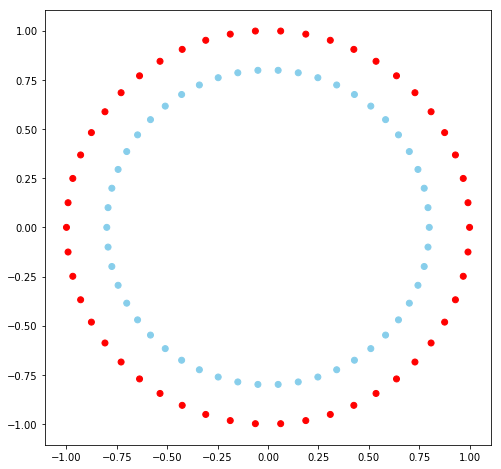

In [25]:
colors = ListedColormap(['red', 'skyblue'])
plt.figure(figsize=(8, 8))
plt.scatter(list(map(lambda x: x[0], circles[0])), list(map(lambda x: x[1], circles[0])), c=circles[1], cmap=colors);

In [26]:
def plot_2d_dataset(data, colors):
    plt.figure(figsize=(8, 8))
    plt.scatter(list(map(lambda x: x[0], data[0])), list(map(lambda x: x[1], data[0])), c=data[1], cmap=colors);

In [27]:
noisy_circles = datasets.make_circles(noise=0.15)

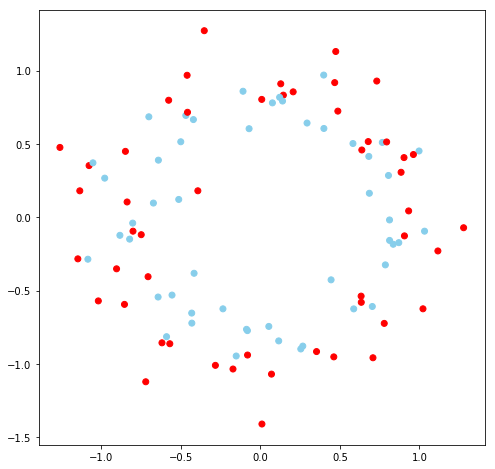

In [28]:
plot_2d_dataset(noisy_circles, colors)

### datasets.make_classification

In [29]:
simple_classification = datasets.make_classification(n_features=2, n_informative=1, 
                                                    n_redundant=1, n_clusters_per_class=1,
                                                    random_state=1)

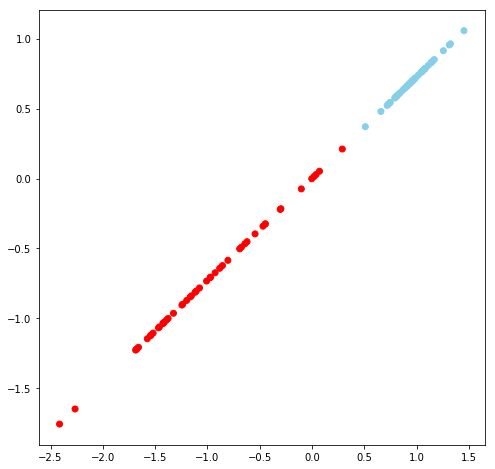

In [30]:
plot_2d_dataset(simple_classification, colors)

In [34]:
simple_classification = datasets.make_classification(n_features=2, n_informative=2, n_classes=4,
                                                    n_redundant=0, n_clusters_per_class=1,
                                                    random_state=1)

colors = ListedColormap(['red', 'skyblue', 'green', 'orange'])

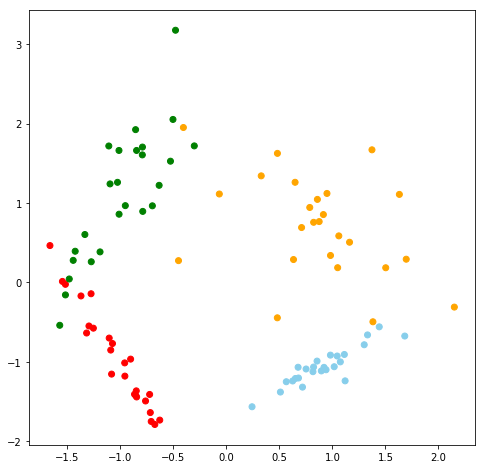

In [35]:
plot_2d_dataset(simple_classification, colors)

In [36]:
iris = datasets.load_iris()

In [38]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [41]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [42]:
import pandas as pd

In [47]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [48]:
iris_df.target = iris_df.target.apply(lambda x: iris.target_names[x])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


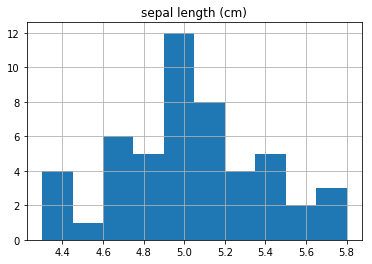

In [50]:
iris_df[iris_df.target == 'setosa'].hist('sepal length (cm)');

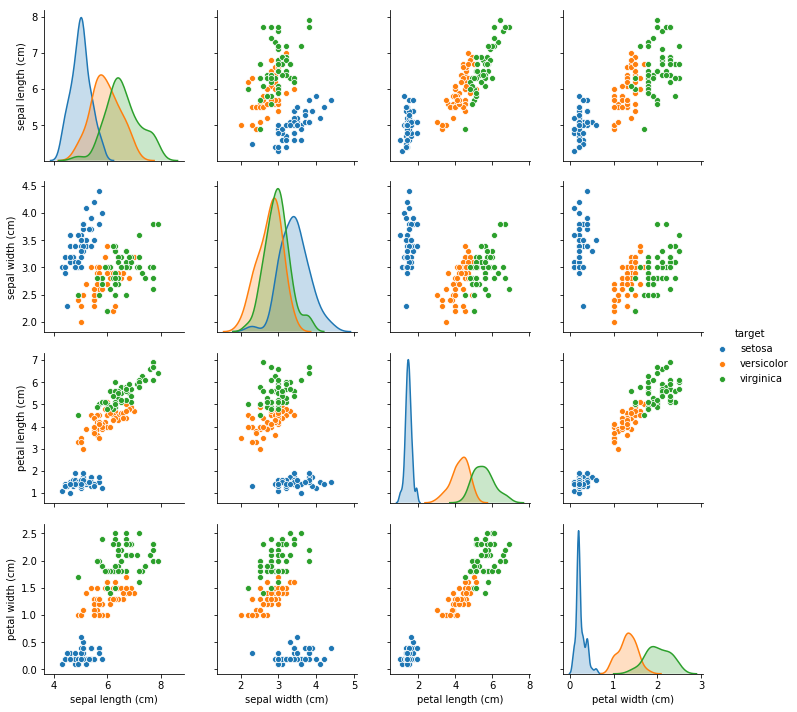

In [52]:
import seaborn as sns
sns.pairplot(iris_df, hue='target');

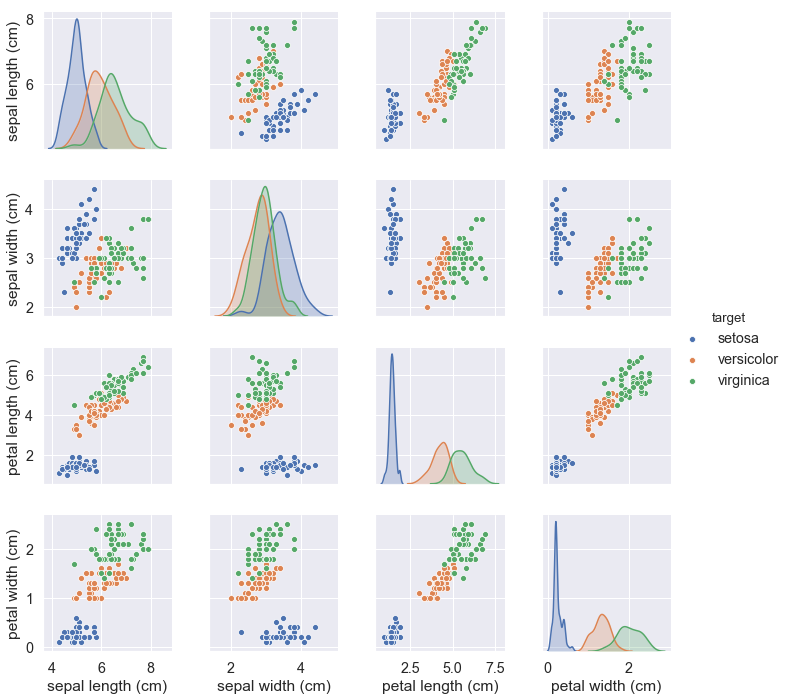

In [53]:
sns.set(font_scale=1.3)
sns.pairplot(iris_df, hue='target')

## Sklearn

In [56]:
from sklearn import model_selection, datasets

import numpy as np

In [57]:
iris = datasets.load_iris()

In [59]:
train_data, test_data, \
train_labels, test_labels = model_selection.train_test_split(iris.data, iris.target, test_size=0.3)

In [61]:
len(test_data)/len(iris.data)

0.3

In [69]:
# KFold -- стратегия кросс-валидации, когда разбиваем на несколько групп
kf = model_selection.KFold(n_splits=4, shuffle=True, random_state=5)
kf.split(train_data)

<generator object _BaseKFold.split at 0x1a2353adb0>

In [ ]:
# StratifiedKFold -- разбивает с учётом соотношения класса
# 